# A Whale off the Port(folio)

In [1]:
# Initial Imports
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
from pathlib import Path
%matplotlib inline

# Whale Returns

In [2]:
# Reading whale returns
whale_returns_csv = Path("whale_returns.csv")
whale_returns_df = pd.read_csv(whale_returns_csv)
whale_returns_df['Date'] = pd.to_datetime(whale_returns_df["Date"], dayfirst = True)
whale_returns_df.set_index(whale_returns_df['Date'], inplace=True)
whale_returns_df.drop(columns=['Date'],inplace=True)
whale_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
whale_returns_df.isnull().mean() * 100
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_returns_df = whale_returns_df.dropna()

# Algorithmic Daily Returns

In [5]:
# Reading algorithmic returns
algo_returns_csv = Path("algo_returns.csv")
algo_returns_df = pd.read_csv(algo_returns_csv)
algo_returns_df['Date'] = pd.to_datetime(algo_returns_df["Date"], dayfirst = True)
algo_returns_df.set_index(algo_returns_df['Date'], inplace=True)
algo_returns_df.drop(columns=['Date'],inplace=True)
algo_returns_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [6]:
# Count nulls
algo_returns_df.isnull().mean() * 100
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algo_returns_df = algo_returns_df.dropna()

# S&P TSX Returns

In [8]:
# Reading S&P TSX closing prices
sp_tsx_history_csv = Path("sp_tsx_history.csv")
sp_tsx_history_df = pd.read_csv(sp_tsx_history_csv)
sp_tsx_history_df['Date']= pd.to_datetime(sp_tsx_history_df["Date"], dayfirst = True)
sp_tsx_history_df.set_index(sp_tsx_history_df['Date'], inplace=True)
sp_tsx_history_df.drop(columns=['Date'],inplace=True)
sp_tsx_history_df['Close'] = sp_tsx_history_df['Close'].str.replace('$', '')
sp_tsx_history_df['Close'] = sp_tsx_history_df['Close'].str.replace(',' , '')
sp_tsx_history_df = sp_tsx_history_df.sort_values("Date", ascending=True)
sp_tsx_history_df.head()

<ipython-input-8-66f6140a13e9>:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  sp_tsx_history_df['Close'] = sp_tsx_history_df['Close'].str.replace('$', '')


,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99


In [9]:
# Check data types
sp_tsx_history_df.dtypes

Close    object
dtype: object

In [10]:
# Fix data types
sp_tsx_history_df['Close'] = sp_tsx_history_df['Close'].astype(float)
sp_tsx_history_df['Close'].dtype

dtype('float64')

In [11]:
# Calculate Daily Returns
sp_tsx_history_df.isnull().sum()
sp_tsx_history_df = sp_tsx_history_df.pct_change()
sp_tsx_history_df.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


In [12]:
# Drop nulls
sp_tsx_history_df.pct_change()
sp_tsx_history_df.dropna(inplace=True)
sp_tsx_history_df.head()

,Close
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


In [13]:
# Rename Column
sp_tsx_history_df = sp_tsx_history_df.rename(columns={"Close":"S&P TSX"})
sp_tsx_history_df.head()

,S&P TSX
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


# Combine Whale, Algorithmic, and S&P TSX Returns

In [14]:
# Concentate all data frames into a single Dataframe
combined_portfolios_df = pd.concat([whale_returns_df, algo_returns_df, sp_tsx_history_df], axis='columns', join='inner')
combined_portfolios_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


# Performance Analysis

<AxesSubplot:title={'center':'Daily Returns'}, xlabel='Date'>

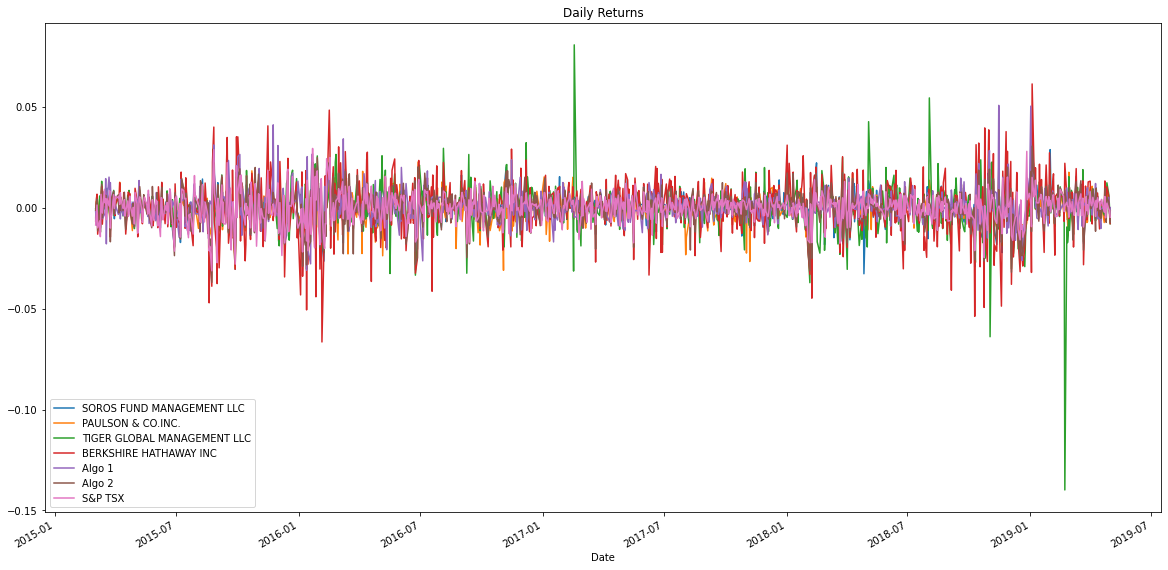

In [15]:
# Plot Daily returns
combined_portfolios_df.plot(title="Daily Returns" , figsize=(20,10))

<AxesSubplot:xlabel='Date'>

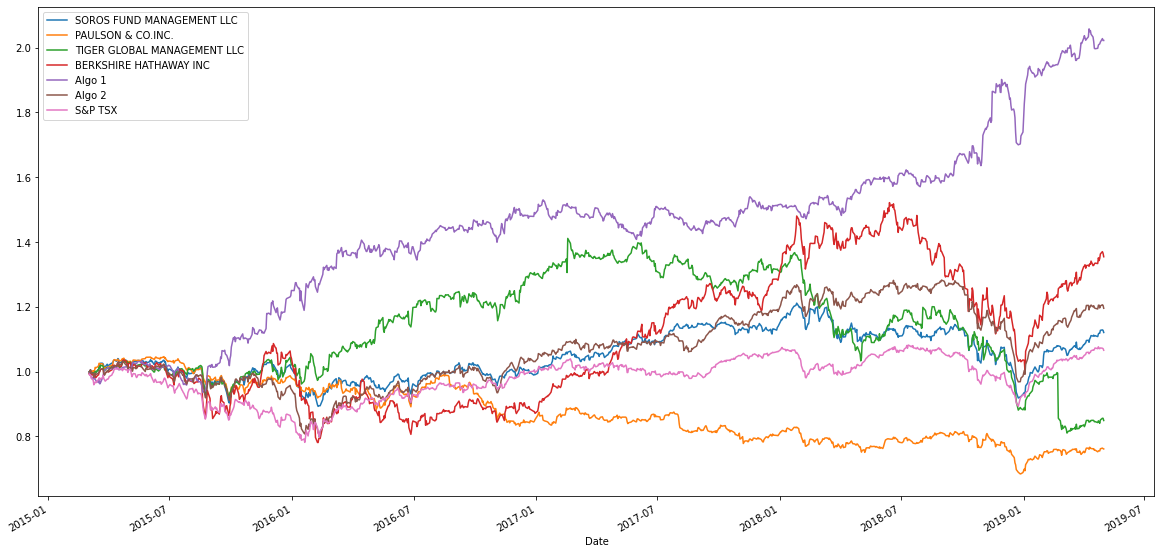

In [16]:
# Plot Cumulative Returns
combined_portfolios_df_cumulative_returns = (1 + combined_portfolios_df).cumprod()
combined_portfolios_df_cumulative_returns.head()
combined_portfolios_df_cumulative_returns.plot(figsize=(20,10))

# Risk Analysis

<AxesSubplot:title={'center':'Portfolio Risk'}>

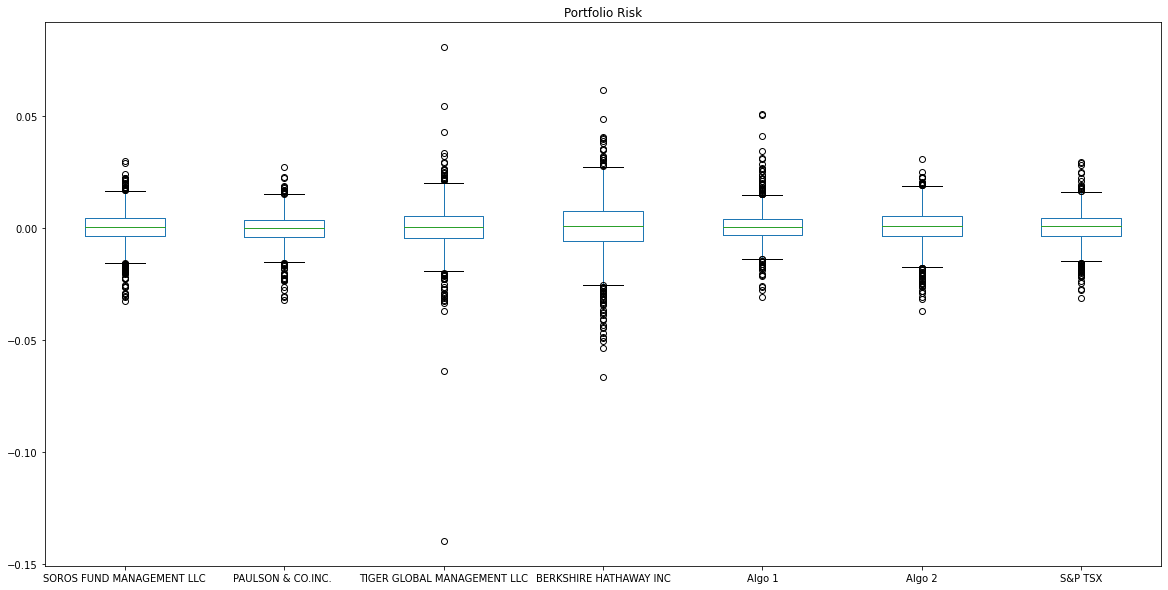

In [17]:
# Box Plot to show risk
combined_portfolios_df.plot.box(title = "Portfolio Risk" , figsize=(20,10))

In [18]:
# Daily Standard Deviations
daily_std = combined_portfolios_df.std().sort_values(ascending=False)
daily_std

BERKSHIRE HATHAWAY INC         0.012826
TIGER GLOBAL MANAGEMENT LLC    0.010883
Algo 2                         0.008326
SOROS FUND MANAGEMENT LLC      0.007828
Algo 1                         0.007589
S&P TSX                        0.007034
PAULSON & CO.INC.              0.006982
dtype: float64

In [19]:
# Determine which portfolios are riskier than the S&P TSX 60
portfolios_riskier_than_SPTSX60=[daily_std > daily_std['S&P TSX']]
portfolios_riskier_than_SPTSX60

[BERKSHIRE HATHAWAY INC          True
 TIGER GLOBAL MANAGEMENT LLC     True
 Algo 2                          True
 SOROS FUND MANAGEMENT LLC       True
 Algo 1                          True
 S&P TSX                        False
 PAULSON & CO.INC.              False
 dtype: bool]

In [20]:
# Calculate the annualized standard deviation
annualized_standard = daily_std *np.sqrt(252)
annualized_standard.sort_values(ascending=False)

BERKSHIRE HATHAWAY INC         0.203599
TIGER GLOBAL MANAGEMENT LLC    0.172759
Algo 2                         0.132177
SOROS FUND MANAGEMENT LLC      0.124259
Algo 1                         0.120470
S&P TSX                        0.111664
PAULSON & CO.INC.              0.110841
dtype: float64

# Rolling Statistics

<AxesSubplot:title={'center':'21 Day Rolling Standard Deviation'}, xlabel='Date'>

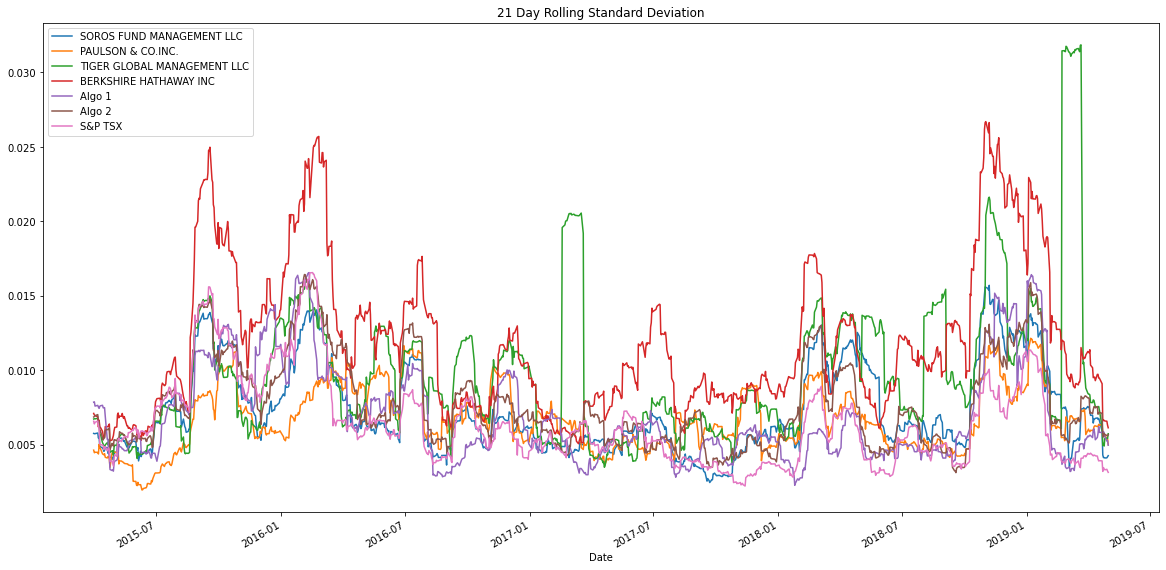

In [21]:
# Calculate and plot the rolling standard deviation for all porfollios using 21 day trading day window
combined_portfolios_df.rolling(window=21).std().plot(title="21 Day Rolling Standard Deviation" , figsize=(20,10))

In [22]:
# Construct a correlation table
correlation = combined_portfolios_df.corr()
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
Algo 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,0.310276
Algo 2,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000,0.737370
S&P TSX,0.673930,0.486511,0.440583,0.557250,0.310276,0.737370,1.000000


<AxesSubplot:>

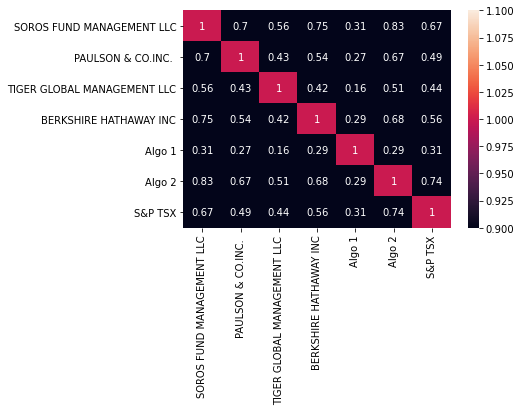

In [23]:
sns.heatmap(correlation, vmin=1, vmax=1,annot=True)

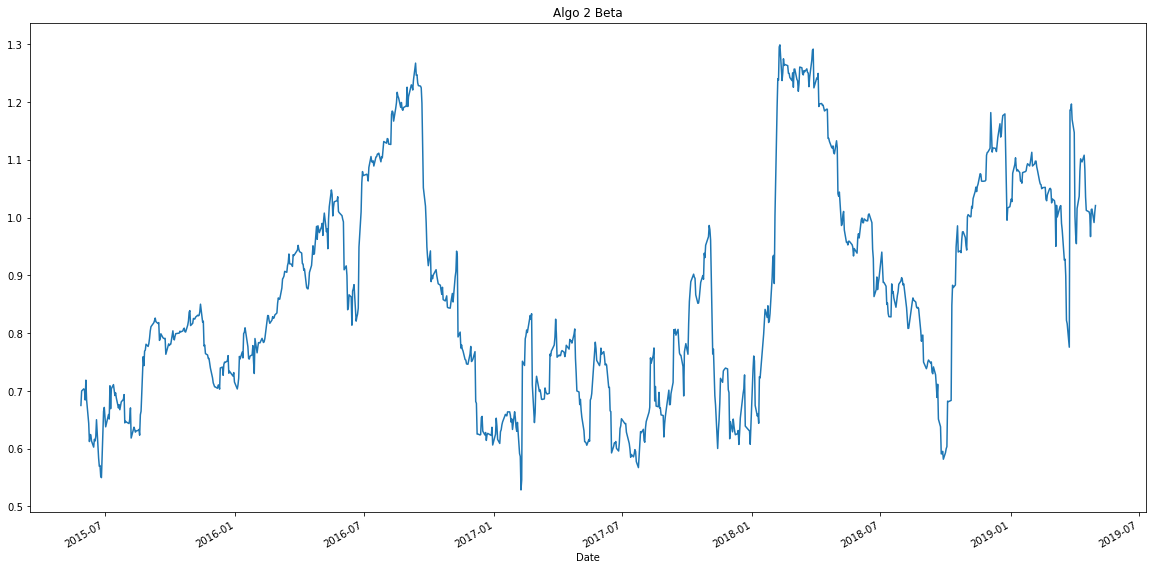

In [24]:
# Calculate Beta for a single portfolio compared to the total market(S&P TSX 60)
algo_2_covariance = combined_portfolios_df['Algo 2'].rolling(window=60).cov(combined_portfolios_df['S&P TSX'])
algo_2_covariance
# Calculate variance of all daily returns vs S&P TSX 60
variance = combined_portfolios_df['S&P TSX'].rolling(window=60).var()
variance
# Calculate beta of all daily returns
algo_2_beta = algo_2_covariance / variance
algo_2_beta_plot = algo_2_beta.plot(title="Algo 2 Beta", figsize=(20,10))

# Rolling Statistics Challenge: Exponentially Weighted Average

<AxesSubplot:title={'center':'Exponentially Weighted Average'}, xlabel='Date'>

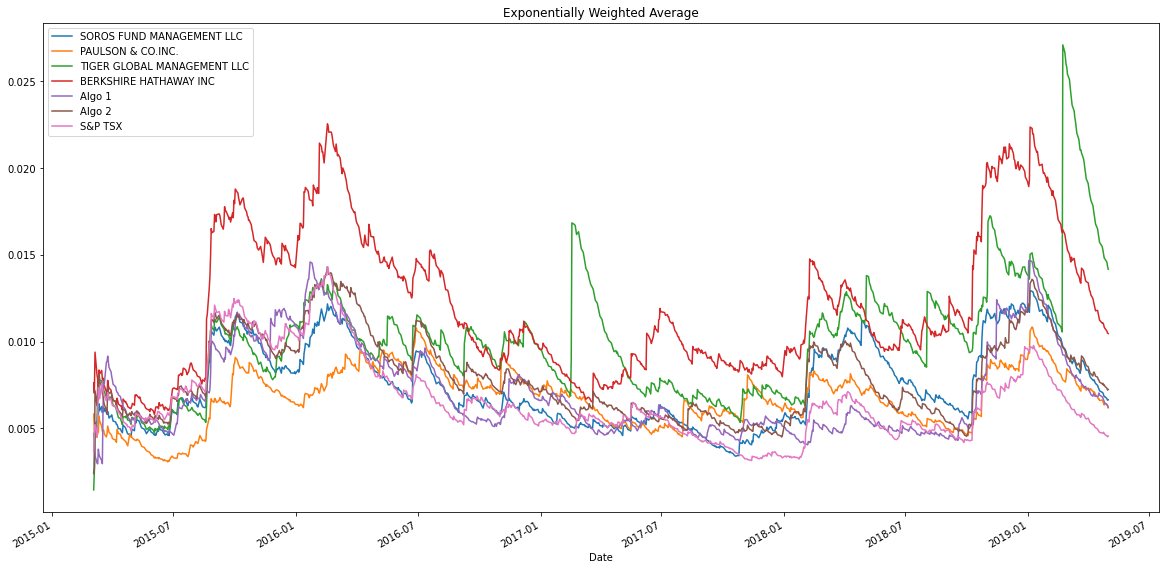

In [25]:
# Challenge: Calculate a rolling window using a exponentially weighted moving average
rolling_window_ewma = combined_portfolios_df.ewm(halflife=21, adjust=True).std().plot(title="Exponentially Weighted Average", figsize=(20,10))
rolling_window_ewma

# Sharpe Ratios

In [26]:
# Calculate annualized Sharpe Ratios
sharpe_ratios = (combined_portfolios_df.mean() * 252) / (combined_portfolios_df.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
Algo 2                         0.396817
S&P TSX                        0.195550
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

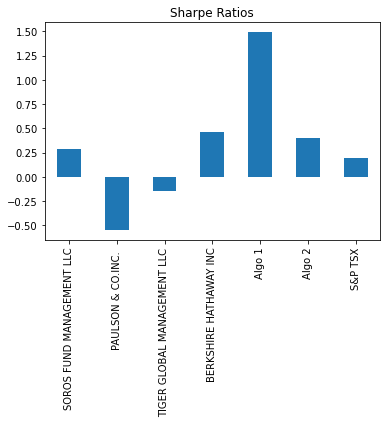

In [27]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

# Custom Portfolio

## Stock 1: Amazon

In [28]:
# Read the first stock
import pandas as pd
from pathlib import Path
Amazon_history_csv = Path("Amazon_history.csv")
Amazon_history_df = pd.read_csv(Amazon_history_csv, index_col='Date', parse_dates=True, infer_datetime_format=True)
Amazon_history_df.head()

,Close
Date,
2015-01-02,308.52
2015-01-05,302.19
2015-01-06,295.29
2015-01-07,298.42
2015-01-08,300.46


## Stock 2: Microsoft

In [29]:
# Read the second stock
Microsoft_history_csv = Path("Microsoft_history.csv")
Microsoft_history_df = pd.read_csv(Amazon_history_csv, index_col='Date', parse_dates=True, infer_datetime_format=True)
Microsoft_history_df.head()

,Close
Date,
2015-01-02,308.52
2015-01-05,302.19
2015-01-06,295.29
2015-01-07,298.42
2015-01-08,300.46


## Stock 3: Tesla

In [30]:
# Read the third stock
Tesla_history_csv =Path("Tesla_history.csv")
Tesla_history_df = pd.read_csv(Tesla_history_csv, index_col='Date', parse_dates=True, infer_datetime_format=True)
Tesla_history_df.head()

,Close
Date,
2015-01-02,43.86
2015-01-05,42.02
2015-01-06,42.26
2015-01-07,42.19
2015-01-08,42.12


In [31]:
# Concatenate all stocks into a single DataFrame
my_portfolio_combined_df = pd.concat([Amazon_history_df, Microsoft_history_df, Tesla_history_df], axis="columns", join="inner")
my_portfolio_combined_df
# Sort datetime index in ascending order
my_portfolio_combined_df.sort_index(inplace=True)
# Set column names
my_portfolio_combined_df.columns = ['AMZN', 'MSFT', 'TSLA']
my_portfolio_combined_df.head()

,AMZN,MSFT,TSLA
Date,,,
2015-01-02,308.52,308.52,43.86
2015-01-05,302.19,302.19,42.02
2015-01-06,295.29,295.29,42.26
2015-01-07,298.42,298.42,42.19
2015-01-08,300.46,300.46,42.12


In [32]:
# Drop nulls
my_portfolio_combined_df.dropna()
my_portfolio_combined_df
my_portfolio_combined_returns = my_portfolio_combined_df.pct_change()
my_portfolio_combined_returns.dropna(inplace=True)
my_portfolio_combined_returns.head()

,AMZN,MSFT,TSLA
Date,,,
2015-01-05,-0.020517,-0.020517,-0.041952
2015-01-06,-0.022833,-0.022833,0.005712
2015-01-07,0.010600,0.010600,-0.001656
2015-01-08,0.006836,0.006836,-0.001659
2015-01-09,-0.011749,-0.011749,-0.018756


# Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [33]:
# Calculate equal weighted porfolio returns (1/3 each)
weights = [1/3, 1/3, 1/3]
my_portfolio_weighted_returns = my_portfolio_combined_returns.dot(weights)
my_portfolio_weighted_returns.head()
my_portfolio_weighted_returns = my_portfolio_weighted_returns.rename("Custom")
my_portfolio_weighted_returns.head()

Date
2015-01-05   -0.027662
2015-01-06   -0.013318
2015-01-07    0.006514
2015-01-08    0.004004
2015-01-09   -0.014084
Name: Custom, dtype: float64

# Add portfolio returns to the DataFrame with the ooriginal portfolios.

In [34]:
# Add "Custom" porfolio to the original DataFrame
combined_portfolio_v2_df = pd.concat([whale_returns_df, algo_returns_df, sp_tsx_history_df, my_portfolio_weighted_returns], axis='columns', join='inner')
combined_portfolio_v2_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX,Custom
Date,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530,0.001901
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371,0.001568
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344,0.005938
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972,-0.024518
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555,-0.007841


<AxesSubplot:title={'center':'Daily Returns'}, xlabel='Date'>

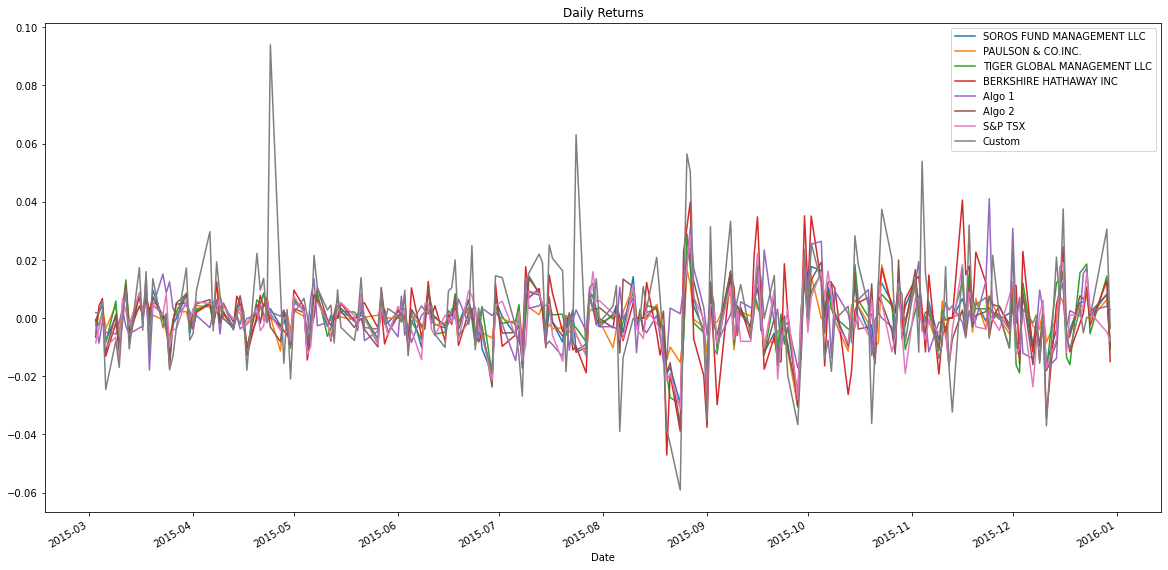

In [35]:
# Plot daily returns
combined_portfolio_v2_df.plot( title="Daily Returns", figsize=(20,10))

<AxesSubplot:xlabel='Date'>

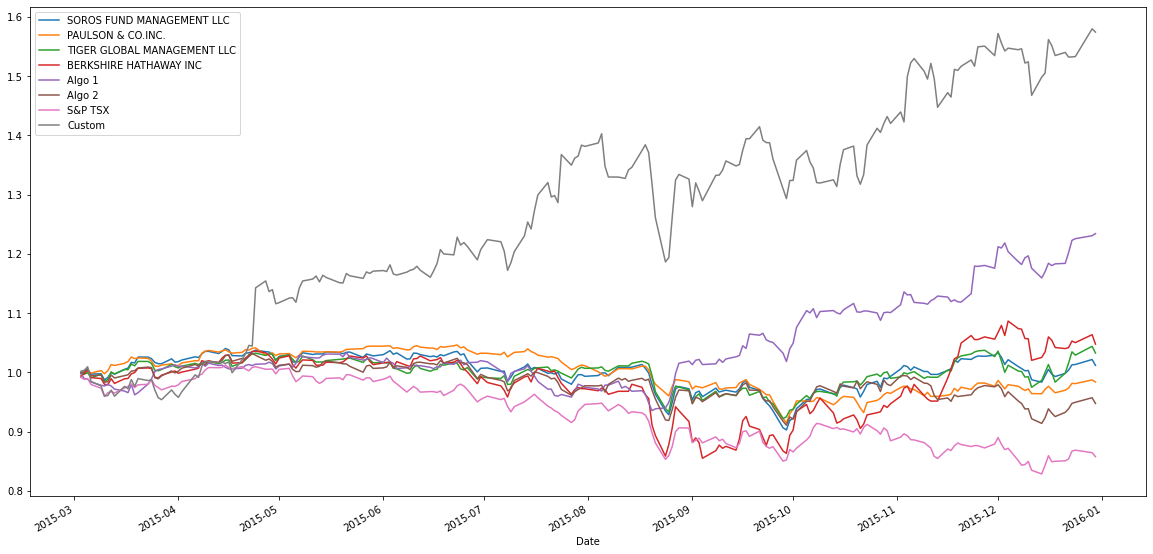

In [36]:
# Plot cumulative returns
combined_portfolio_v2_df_cumulative_returns = (1 + combined_portfolio_v2_df).cumprod()
combined_portfolio_v2_df_cumulative_returns.head()
combined_portfolio_v2_df_cumulative_returns.plot(figsize=(20,10))

<AxesSubplot:title={'center':'Portfolio Risk'}>

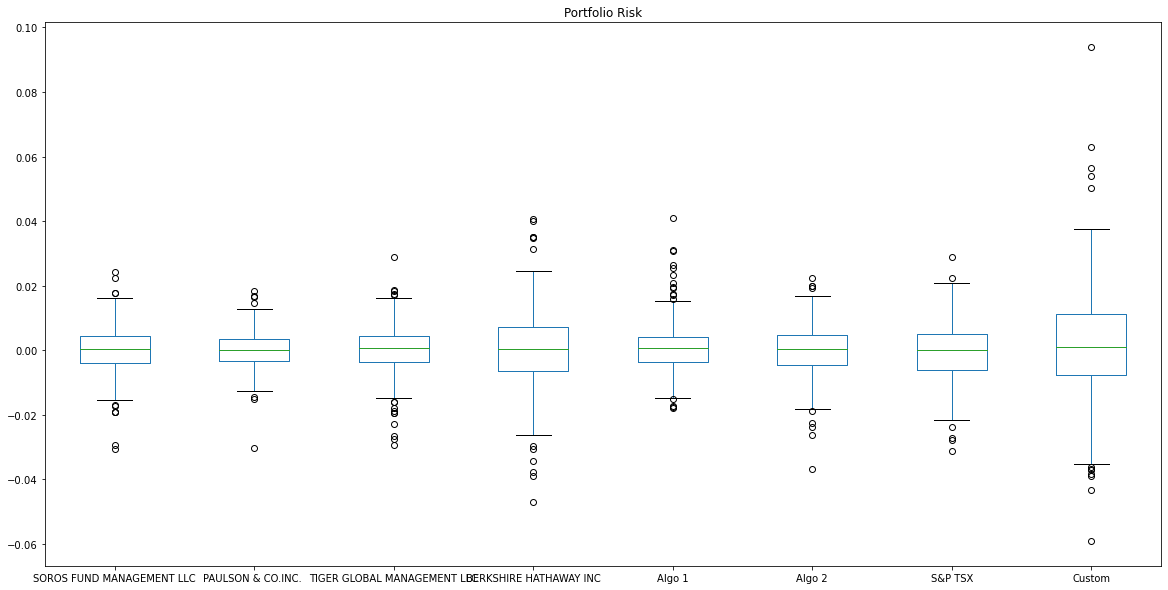

In [37]:
# Box plot to show risk
combined_portfolio_v2_df.plot.box(title= "Portfolio Risk", figsize=(20,10))

# Risk Analysis

In [38]:
# Risk
combined_portfolio_v2_df_daily_std = combined_portfolio_v2_df.std().sort_values(ascending=False)
combined_portfolio_v2_df_daily_std

Custom                         0.018207
BERKSHIRE HATHAWAY INC         0.012830
S&P TSX                        0.009170
Algo 1                         0.008913
Algo 2                         0.008738
TIGER GLOBAL MANAGEMENT LLC    0.008509
SOROS FUND MANAGEMENT LLC      0.008019
PAULSON & CO.INC.              0.006012
dtype: float64

In [39]:
# Determine which portfolios are riskier than the S&P TSX 60
portfolios_riskier_than_2_SPTSX = [combined_portfolio_v2_df_daily_std > combined_portfolio_v2_df_daily_std['S&P TSX']]
portfolios_riskier_than_2_SPTSX

[Custom                          True
 BERKSHIRE HATHAWAY INC          True
 S&P TSX                        False
 Algo 1                         False
 Algo 2                         False
 TIGER GLOBAL MANAGEMENT LLC    False
 SOROS FUND MANAGEMENT LLC      False
 PAULSON & CO.INC.              False
 dtype: bool]

# Calculate the Annualized Standard Deviation

In [40]:
# Calculate the annualized standard deviation
combined_portfolio_v2_df_annualized_std = combined_portfolio_v2_df_daily_std *np.sqrt(252)
combined_portfolio_v2_df_annualized_std.sort_values(ascending=False)

Custom                         0.289024
BERKSHIRE HATHAWAY INC         0.203663
S&P TSX                        0.145572
Algo 1                         0.141493
Algo 2                         0.138719
TIGER GLOBAL MANAGEMENT LLC    0.135072
SOROS FUND MANAGEMENT LLC      0.127293
PAULSON & CO.INC.              0.095444
dtype: float64

# 21 Day Rolling Standard Deviation

<AxesSubplot:title={'center':'21 Day Rolling Standard Deviation'}, xlabel='Date'>

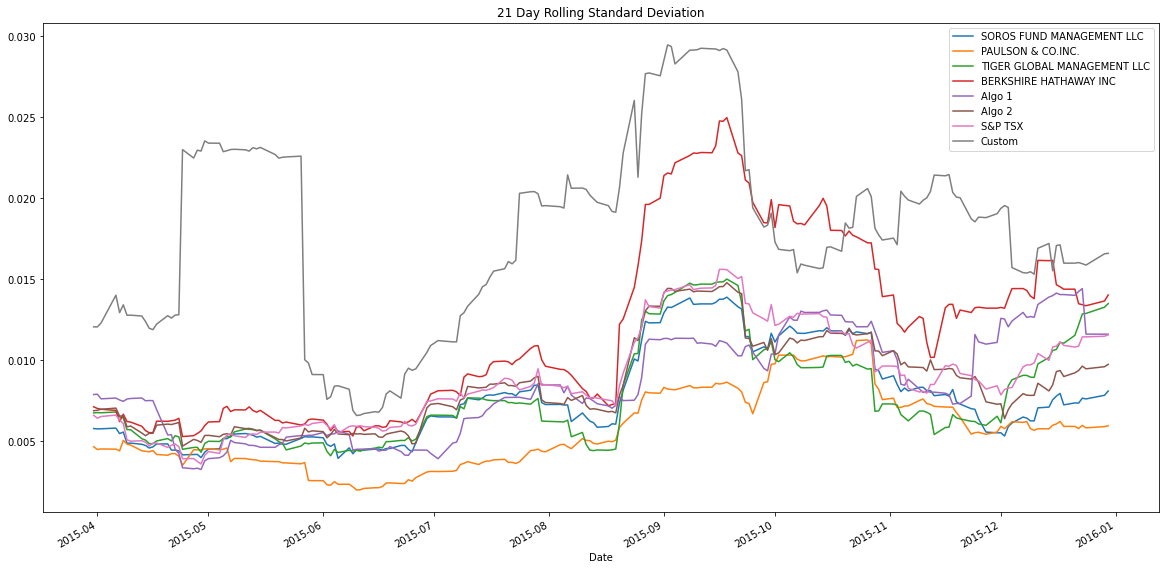

In [41]:
# 21 Day Rolling Standard Deviation
combined_portfolio_v2_df.rolling(window=21).std().plot(title="21 Day Rolling Standard Deviation", figsize=(20,10))

# Calculate the Sharpe ratios and generate a bar plot

In [42]:
# Annualized Sharpe Ratios
combined_portfolio_v2_df_sharpe_ratios = (combined_portfolio_v2_df.mean() * 252) / (combined_portfolio_v2_df.std() * np.sqrt(252))
combined_portfolio_v2_df_sharpe_ratios.sort_values(ascending=False)

Custom                         2.064533
Algo 1                         1.888885
BERKSHIRE HATHAWAY INC         0.380901
TIGER GLOBAL MANAGEMENT LLC    0.358350
SOROS FUND MANAGEMENT LLC      0.175717
PAULSON & CO.INC.             -0.162197
Algo 2                        -0.406230
S&P TSX                       -1.216319
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

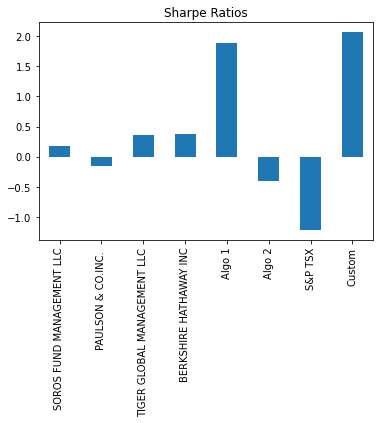

In [43]:
# Sharpe ratios as a bar plot
combined_portfolio_v2_df_sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

# Calculate and plot the correlation.

In [44]:
# Create a correlation analysis
combined_portfolio_v2_df_correlation = combined_portfolio_v2_df.corr()
combined_portfolio_v2_df_correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX,Custom
SOROS FUND MANAGEMENT LLC,1.000000,0.811018,0.842414,0.776954,0.442284,0.872760,0.786417,0.591563
PAULSON & CO.INC.,0.811018,1.000000,0.729439,0.671815,0.373060,0.716057,0.594209,0.526739
TIGER GLOBAL MANAGEMENT LLC,0.842414,0.729439,1.000000,0.704181,0.319952,0.816560,0.721573,0.631329
BERKSHIRE HATHAWAY INC,0.776954,0.671815,0.704181,1.000000,0.364992,0.711734,0.660112,0.571090
Algo 1,0.442284,0.373060,0.319952,0.364992,1.000000,0.354753,0.422606,0.275707
Algo 2,0.872760,0.716057,0.816560,0.711734,0.354753,1.000000,0.780782,0.551771
S&P TSX,0.786417,0.594209,0.721573,0.660112,0.422606,0.780782,1.000000,0.488003
Custom,0.591563,0.526739,0.631329,0.571090,0.275707,0.551771,0.488003,1.000000


<AxesSubplot:>

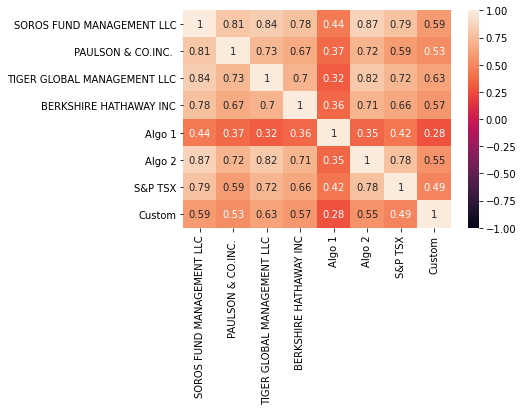

In [45]:
sns.heatmap(combined_portfolio_v2_df_correlation,  vmin=-1, vmax=1,annot=True)

# Calculate and plot the 60-day rolling beta for your portfolio compared to the S&P 60 TSX.

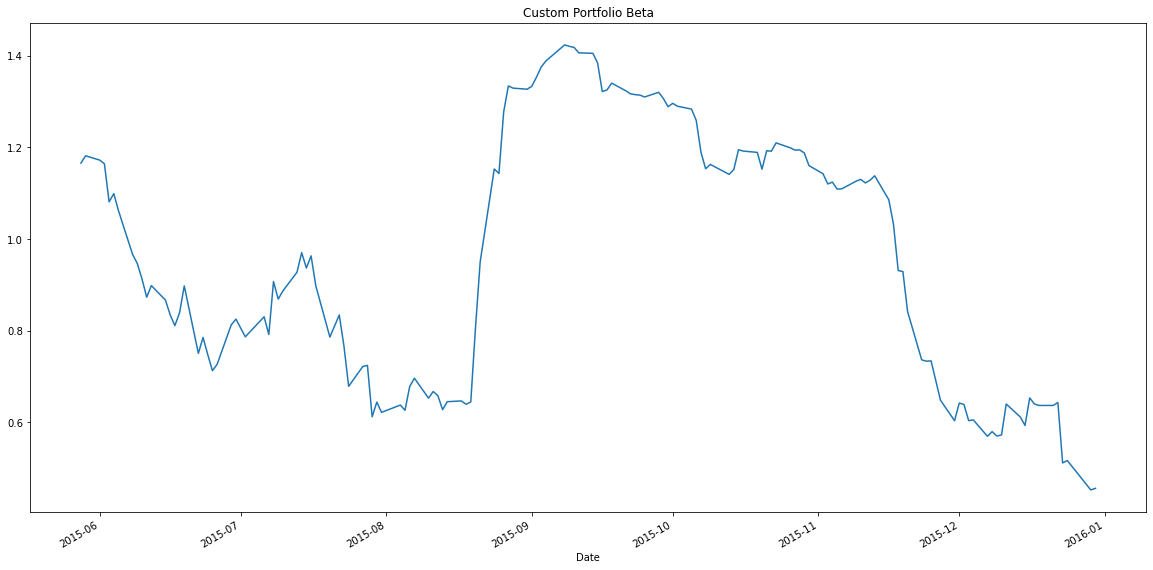

In [46]:
# Beta
custom_covariance = combined_portfolio_v2_df['Custom'].rolling(window=60).cov(combined_portfolio_v2_df['S&P TSX'])
custom_covariance
# Calculate variance of all daily returns vs. S&P TSX
variance_2 = combined_portfolio_v2_df['S&P TSX'].rolling(window=60).var()
variance_2
# Calculate beta of all daily returns 
custom_beta = custom_covariance / variance_2
custom_beta_plot = custom_beta.plot(title="Custom Portfolio Beta", figsize=(20, 10))

# How does your porfolio do?

The portfolio that I chose has the highest annualized standard deviation compared to all the portfolios being analyzed, which is not only shown by having the highest standard deviation but is also evident in the 21 day rolling standard deviation plot.
My portfolio also the highest sharpe ratio followed by the Algo_1 porfolio which shows that my portfolio performed better than the Algorithmic ones chosen by Harold. My portfolio is the riskiest based on "Risk Analysis". 